In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
users_df = pd.read_csv('../Data_Engineering/02Prep_Layer/users_cleaned.csv')
domains_df = pd.read_csv('../Data_Engineering/02Prep_Layer/domains_cleaned.csv')
trainings_df = pd.read_csv('../Data_Engineering/02Prep_Layer/trainings_cleaned.csv')
assignments_df = pd.read_csv('../Data_Engineering/02Prep_Layer/training_assignments_cleaned.csv')
scores_df = pd.read_csv('../Data_Engineering/02Prep_Layer/scores_cleaned.csv')

average_scores_df = pd.read_csv('../Data_Engineering/03Transform/Average_Scores_Per_employee.csv')

# Inspect datasets
print(users_df.head())
print(scores_df.head())

   userId firstName lastName   role   designation
0       1    Amanda   Durham  ADMIN    IT Manager
1       2      Kirk    Zhang  ADMIN      HR Admin
2       3    Sherry  Simmons  ADMIN    IT Manager
3       4  Fernando    Myers  ADMIN  System Admin
4       5    Janice    Blake  ADMIN  System Admin
   employeeId  trainingId  trainerId  codeQuality  communication  \
0         221           8         44           79             81   
1         221          46        187           39             43   
2         221           3        153           43             51   
3         222          50         70           92              7   
4         222          12        156            6             92   

   problemSolving  timeManagement  assignment_score  
0              70              23                25  
1              68               5                70  
2              43              47                 4  
3              50              44                56  
4              25    

In [5]:
print(scores_df.columns)  
print(assignments_df.columns)

Index(['employeeId', 'trainingId', 'trainerId', 'codeQuality', 'communication',
       'problemSolving', 'timeManagement', 'assignment_score'],
      dtype='object')
Index(['employeeId', 'trainingId'], dtype='object')


In [6]:

# merged_df = scores_df.merge(assignments_df, on='trainingId', how='left')
# merged_df

In [7]:
# print(scores_df.groupby('trainingId').size().sort_values(ascending=False).head(10))
# print(assignments_df.groupby('trainingId').size().sort_values(ascending=False).head(10))


In [8]:
print(scores_df.duplicated(subset=['trainingId', 'employeeId']).sum())
print(assignments_df.duplicated(subset=['trainingId', 'employeeId']).sum())

0
0


In [9]:
merged_df = scores_df.merge(assignments_df, on=['trainingId', 'employeeId'], how='left')
merged_df = merged_df.merge(trainings_df[['trainingId', 'domainId', 'duration(in days)']], on='trainingId', how='left')
merged_df = merged_df.merge(users_df[['userId', 'role','designation']], left_on='employeeId', right_on='userId', how='left')
merged_df = merged_df.merge(domains_df[['domainId', 'domainName']], on='domainId', how='left')


merged_df

# merged_df.describe()
# 

,employeeId,trainingId,trainerId,codeQuality,communication,problemSolving,timeManagement,assignment_score,domainId,duration(in days),userId,role,designation,domainName
0,221,8,44,79,81,70,23,25,2,10,221,EMPLOYEE,Software Engineer II,Machine Learning
1,221,46,187,39,43,68,5,70,1,32,221,EMPLOYEE,Software Engineer II,Data Engineering
2,221,3,153,43,51,43,47,4,1,58,221,EMPLOYEE,Software Engineer II,Data Engineering
3,222,50,70,92,7,50,44,56,3,11,222,EMPLOYEE,Software Engineer II,Full Stack
4,222,12,156,6,92,25,94,18,3,28,222,EMPLOYEE,Software Engineer II,Full Stack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,10219,21,191,44,99,68,48,27,1,17,10219,EMPLOYEE,Software Engineer I,Data Engineering
29996,10219,15,126,61,50,93,47,80,3,21,10219,EMPLOYEE,Software Engineer I,Full Stack
29997,10220,20,35,49,3,92,5,60,2,60,10220,EMPLOYEE,Software Engineer III,Machine Learning
29998,10220,28,134,9,59,7,86,35,2,29,10220,EMPLOYEE,Software Engineer III,Machine Learning


In [10]:
display(merged_df.head(10))
print(merged_df[['employeeId', 'trainingId']].drop_duplicates().shape)

,employeeId,trainingId,trainerId,codeQuality,communication,problemSolving,timeManagement,assignment_score,domainId,duration(in days),userId,role,designation,domainName
0,221,8,44,79,81,70,23,25,2,10,221,EMPLOYEE,Software Engineer II,Machine Learning
1,221,46,187,39,43,68,5,70,1,32,221,EMPLOYEE,Software Engineer II,Data Engineering
2,221,3,153,43,51,43,47,4,1,58,221,EMPLOYEE,Software Engineer II,Data Engineering
3,222,50,70,92,7,50,44,56,3,11,222,EMPLOYEE,Software Engineer II,Full Stack
4,222,12,156,6,92,25,94,18,3,28,222,EMPLOYEE,Software Engineer II,Full Stack
5,222,29,159,71,52,62,35,22,2,11,222,EMPLOYEE,Software Engineer II,Machine Learning
6,223,31,83,45,53,76,37,54,2,52,223,EMPLOYEE,Solution Consultant,Machine Learning
7,223,36,201,38,78,8,19,42,2,46,223,EMPLOYEE,Solution Consultant,Machine Learning
8,223,7,73,87,89,21,0,70,1,40,223,EMPLOYEE,Solution Consultant,Data Engineering
9,224,7,73,91,53,88,63,62,1,40,224,EMPLOYEE,Solution Enabler,Data Engineering


(30000, 2)


In [11]:
employee_training_counts = merged_df.groupby('employeeId').size()
employee_training_counts
unexpected_counts = employee_training_counts[employee_training_counts != 3]
print(f"Number of employees with incorrect training counts: {len(unexpected_counts)}")
print(unexpected_counts)

Number of employees with incorrect training counts: 0
Series([], dtype: int64)


In [12]:
# missing_trainings = assignments_df[~assignments_df['employeeId'].isin(scores_df['employeeId'])]
# print("Employees with missing training records:\n", missing_trainings)


In [13]:
merged_df['assignment_score'].fillna(0, inplace=True)
merged_df

# merged_df.drop(columns=['score_variance','total_score', 'training_success','average_score','role_performance'])

,employeeId,trainingId,trainerId,codeQuality,communication,problemSolving,timeManagement,assignment_score,domainId,duration(in days),userId,role,designation,domainName
0,221,8,44,79,81,70,23,25,2,10,221,EMPLOYEE,Software Engineer II,Machine Learning
1,221,46,187,39,43,68,5,70,1,32,221,EMPLOYEE,Software Engineer II,Data Engineering
2,221,3,153,43,51,43,47,4,1,58,221,EMPLOYEE,Software Engineer II,Data Engineering
3,222,50,70,92,7,50,44,56,3,11,222,EMPLOYEE,Software Engineer II,Full Stack
4,222,12,156,6,92,25,94,18,3,28,222,EMPLOYEE,Software Engineer II,Full Stack
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,10219,21,191,44,99,68,48,27,1,17,10219,EMPLOYEE,Software Engineer I,Data Engineering
29996,10219,15,126,61,50,93,47,80,3,21,10219,EMPLOYEE,Software Engineer I,Full Stack
29997,10220,20,35,49,3,92,5,60,2,60,10220,EMPLOYEE,Software Engineer III,Machine Learning
29998,10220,28,134,9,59,7,86,35,2,29,10220,EMPLOYEE,Software Engineer III,Machine Learning


##  Feature Engineering

In [14]:
# Success Rate of Trainings Completed by Employee

merged_df['training_success'] = merged_df['assignment_score'].apply(lambda x: 1 if x >= 60 else 0)
merged_df['training_success']
merged_df

success_rate = merged_df.groupby('employeeId')['training_success'].mean().reset_index()
success_rate.columns = ['employeeId', 'success_rate']
success_rate


,employeeId,success_rate
0,221,0.333333
1,222,0.000000
2,223,0.333333
3,224,0.333333
4,225,0.333333
...,...,...
9995,10216,0.333333
9996,10217,0.333333
9997,10218,0.333333
9998,10219,0.333333


In [15]:
# Consistency of Performance (Score Variance)
#Calculating variance of every employee in trainings


variation_scores = merged_df.groupby('employeeId')[['codeQuality', 'communication', 
                                                          'problemSolving', 'timeManagement', 
                                                          'assignment_score']].var().reset_index().round(2)

variation_scores_std = merged_df.groupby('employeeId')[['codeQuality', 'communication', 
                                                               'problemSolving', 'timeManagement', 
                                                               'assignment_score']].std().reset_index().round(2)

print("Variance of Scores Across Trainings:")
display(variation_scores.head())

print("\nStandard Deviation of Scores Across Trainings:")
display(variation_scores_std.head())


Variance of Scores Across Trainings:


,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score
0,221,485.33,401.33,226.33,444.00,1137.00
1,222,2010.33,1808.33,356.33,1010.33,436.00
2,223,702.33,340.33,1303.00,342.33,197.33
3,224,1621.33,513.00,1764.00,124.33,961.00
4,225,382.33,800.33,1649.33,862.33,247.00



Standard Deviation of Scores Across Trainings:


,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score
0,221,22.03,20.03,15.04,21.07,33.72
1,222,44.84,42.52,18.88,31.79,20.88
2,223,26.50,18.45,36.10,18.50,14.05
3,224,40.27,22.65,42.00,11.15,31.00
4,225,19.55,28.29,40.61,29.37,15.72


In [16]:
variation_scores = variation_scores.rename(columns={
    'codeQuality': 'codeQuality_variance',
    'communication': 'communication_variance',
    'problemSolving': 'problemSolving_variance',
    'timeManagement': 'timeManagement_variance',
    'assignment_score': 'assignment_score_variance'
})

variation_scores


,employeeId,codeQuality_variance,communication_variance,problemSolving_variance,timeManagement_variance,assignment_score_variance
0,221,485.33,401.33,226.33,444.00,1137.00
1,222,2010.33,1808.33,356.33,1010.33,436.00
2,223,702.33,340.33,1303.00,342.33,197.33
3,224,1621.33,513.00,1764.00,124.33,961.00
4,225,382.33,800.33,1649.33,862.33,247.00
...,...,...,...,...,...,...
9995,10216,189.00,161.33,1684.33,344.33,1210.33
9996,10217,1240.33,886.33,21.33,487.00,259.00
9997,10218,1825.33,616.33,190.33,490.33,769.00
9998,10219,272.33,637.00,160.33,0.33,1122.33


In [17]:
#Grouping merged_df to show the details of every employee 
#Then Merging it with variation dataframe

aggregated_scores = merged_df.groupby('employeeId')[['codeQuality', 'communication', 
                                                      'problemSolving', 'timeManagement', 
                                                      'assignment_score']].mean().reset_index().round(2)

aggr_variation_merged_df = aggregated_scores.merge(variation_scores, on=['employeeId'], how='left')

aggr_variation_merged_df


,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score,codeQuality_variance,communication_variance,problemSolving_variance,timeManagement_variance,assignment_score_variance
0,221,53.67,58.33,60.33,25.00,33.00,485.33,401.33,226.33,444.00,1137.00
1,222,56.33,50.33,45.67,57.67,32.00,2010.33,1808.33,356.33,1010.33,436.00
2,223,56.67,73.33,35.00,18.67,55.33,702.33,340.33,1303.00,342.33,197.33
3,224,53.67,74.00,58.00,75.67,31.00,1621.33,513.00,1764.00,124.33,961.00
4,225,31.67,70.33,63.67,45.67,50.00,382.33,800.33,1649.33,862.33,247.00
...,...,...,...,...,...,...,...,...,...,...,...
9995,10216,47.00,69.67,60.33,68.33,27.33,189.00,161.33,1684.33,344.33,1210.33
9996,10217,40.33,36.33,60.33,56.00,58.00,1240.33,886.33,21.33,487.00,259.00
9997,10218,44.33,67.67,62.33,36.33,46.00,1825.33,616.33,190.33,490.33,769.00
9998,10219,44.33,78.00,79.33,47.67,41.67,272.33,637.00,160.33,0.33,1122.33


In [18]:
#Calculating the total scores(add all the metrics and assignment_score) of every employee

def calculate_total_score(row):
    performance_score = (
        row['codeQuality'] + row['communication'] + 
        row['problemSolving'] + row['timeManagement']
    )
    total_score = performance_score + row['assignment_score']
    return total_score

aggr_variation_merged_df['total_score'] = aggr_variation_merged_df.apply(calculate_total_score, axis=1)
aggr_variation_merged_df   

# merged_df

,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score,codeQuality_variance,communication_variance,problemSolving_variance,timeManagement_variance,assignment_score_variance,total_score
0,221,53.67,58.33,60.33,25.00,33.00,485.33,401.33,226.33,444.00,1137.00,230.33
1,222,56.33,50.33,45.67,57.67,32.00,2010.33,1808.33,356.33,1010.33,436.00,242.00
2,223,56.67,73.33,35.00,18.67,55.33,702.33,340.33,1303.00,342.33,197.33,239.00
3,224,53.67,74.00,58.00,75.67,31.00,1621.33,513.00,1764.00,124.33,961.00,292.34
4,225,31.67,70.33,63.67,45.67,50.00,382.33,800.33,1649.33,862.33,247.00,261.34
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10216,47.00,69.67,60.33,68.33,27.33,189.00,161.33,1684.33,344.33,1210.33,272.66
9996,10217,40.33,36.33,60.33,56.00,58.00,1240.33,886.33,21.33,487.00,259.00,250.99
9997,10218,44.33,67.67,62.33,36.33,46.00,1825.33,616.33,190.33,490.33,769.00,256.66
9998,10219,44.33,78.00,79.33,47.67,41.67,272.33,637.00,160.33,0.33,1122.33,291.00


In [19]:

var_success_merged_df = aggr_variation_merged_df.merge(success_rate, on=['employeeId'], how='left')
var_success_merged_df

,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score,codeQuality_variance,communication_variance,problemSolving_variance,timeManagement_variance,assignment_score_variance,total_score,success_rate
0,221,53.67,58.33,60.33,25.00,33.00,485.33,401.33,226.33,444.00,1137.00,230.33,0.333333
1,222,56.33,50.33,45.67,57.67,32.00,2010.33,1808.33,356.33,1010.33,436.00,242.00,0.000000
2,223,56.67,73.33,35.00,18.67,55.33,702.33,340.33,1303.00,342.33,197.33,239.00,0.333333
3,224,53.67,74.00,58.00,75.67,31.00,1621.33,513.00,1764.00,124.33,961.00,292.34,0.333333
4,225,31.67,70.33,63.67,45.67,50.00,382.33,800.33,1649.33,862.33,247.00,261.34,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10216,47.00,69.67,60.33,68.33,27.33,189.00,161.33,1684.33,344.33,1210.33,272.66,0.333333
9996,10217,40.33,36.33,60.33,56.00,58.00,1240.33,886.33,21.33,487.00,259.00,250.99,0.333333
9997,10218,44.33,67.67,62.33,36.33,46.00,1825.33,616.33,190.33,490.33,769.00,256.66,0.333333
9998,10219,44.33,78.00,79.33,47.67,41.67,272.33,637.00,160.33,0.33,1122.33,291.00,0.333333


In [20]:
# Calculate the number of unique domains per employee
domain_counts = merged_df.groupby('employeeId')['domainId'].nunique().reset_index()
domain_counts.columns = ['employeeId', 'domain_count']

domain_counts

success_domain_df = var_success_merged_df.merge(domain_counts, on='employeeId', how='left')
# print(success_domain_df[['employeeId', 'domain_count']].head())
success_domain_df.head()



##final training

,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score,codeQuality_variance,communication_variance,problemSolving_variance,timeManagement_variance,assignment_score_variance,total_score,success_rate,domain_count
0,221,53.67,58.33,60.33,25.00,33.00,485.33,401.33,226.33,444.00,1137.00,230.33,0.333333,2
1,222,56.33,50.33,45.67,57.67,32.00,2010.33,1808.33,356.33,1010.33,436.00,242.00,0.000000,2
2,223,56.67,73.33,35.00,18.67,55.33,702.33,340.33,1303.00,342.33,197.33,239.00,0.333333,2
3,224,53.67,74.00,58.00,75.67,31.00,1621.33,513.00,1764.00,124.33,961.00,292.34,0.333333,2
4,225,31.67,70.33,63.67,45.67,50.00,382.33,800.33,1649.33,862.33,247.00,261.34,0.333333,2


In [21]:
employee_avg_scores = merged_df.groupby(['employeeId', 'designation'])[
    ['codeQuality', 'communication', 'problemSolving', 'timeManagement', 'assignment_score']
].mean().reset_index()

employee_avg_scores['average_score'] = employee_avg_scores[
    ['codeQuality', 'communication', 'problemSolving', 'timeManagement', 'assignment_score']
].mean(axis=1)

# employee_avg_scores['designation_performance'] = employee_avg_scores['designation'] + '_' + employee_avg_scores['average_score'].round(1).astype(str)

employee_avg_scores

success_domain_df_01 = success_domain_df.merge(employee_avg_scores[['employeeId','designation', 'average_score']], on=['employeeId'], how='left')

# success_domain_df_01 = success_domain_df_01.drop(columns=['total_score'])

success_domain_df_01
final_df = success_domain_df_01
final_df
# print(employee_avg_scores[['employeeId', 'designation', 'average_score', 'designation_performance']])


,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score,codeQuality_variance,communication_variance,problemSolving_variance,timeManagement_variance,assignment_score_variance,total_score,success_rate,domain_count,designation,average_score
0,221,53.67,58.33,60.33,25.00,33.00,485.33,401.33,226.33,444.00,1137.00,230.33,0.333333,2,Software Engineer II,46.066667
1,222,56.33,50.33,45.67,57.67,32.00,2010.33,1808.33,356.33,1010.33,436.00,242.00,0.000000,2,Software Engineer II,48.400000
2,223,56.67,73.33,35.00,18.67,55.33,702.33,340.33,1303.00,342.33,197.33,239.00,0.333333,2,Solution Consultant,47.800000
3,224,53.67,74.00,58.00,75.67,31.00,1621.33,513.00,1764.00,124.33,961.00,292.34,0.333333,2,Solution Enabler,58.466667
4,225,31.67,70.33,63.67,45.67,50.00,382.33,800.33,1649.33,862.33,247.00,261.34,0.333333,2,Software Engineer I,52.266667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10216,47.00,69.67,60.33,68.33,27.33,189.00,161.33,1684.33,344.33,1210.33,272.66,0.333333,2,Solution Enabler,54.533333
9996,10217,40.33,36.33,60.33,56.00,58.00,1240.33,886.33,21.33,487.00,259.00,250.99,0.333333,2,Software Engineer I,50.200000
9997,10218,44.33,67.67,62.33,36.33,46.00,1825.33,616.33,190.33,490.33,769.00,256.66,0.333333,2,Software Engineer II,51.333333
9998,10219,44.33,78.00,79.33,47.67,41.67,272.33,637.00,160.33,0.33,1122.33,291.00,0.333333,2,Software Engineer I,58.200000


    Target Variable

In [22]:
def evaluate_promotion(row):
    if row['total_score'] > 300 or row['average_score'] > 55:
        return "Promoted"
    elif row['total_score'] > 210 or row['average_score'] > 45:
        return "In Review"
    else:
        return "Layoff"

# Apply the function to create the PromotionStatus column
final_df['PromotionStatus'] = final_df.apply(evaluate_promotion, axis=1)

final_df['PromotionStatus'].value_counts()


PromotionStatus
In Review    5943
Promoted     2612
Layoff       1445
Name: count, dtype: int64

In [23]:
max_total_score = final_df['total_score'].max()
print("Maximum Total Score:", max_total_score)

Maximum Total Score: 425.01000000000005


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   employeeId                 10000 non-null  int64  
 1   codeQuality                10000 non-null  float64
 2   communication              10000 non-null  float64
 3   problemSolving             10000 non-null  float64
 4   timeManagement             10000 non-null  float64
 5   assignment_score           10000 non-null  float64
 6   codeQuality_variance       10000 non-null  float64
 7   communication_variance     10000 non-null  float64
 8   problemSolving_variance    10000 non-null  float64
 9   timeManagement_variance    10000 non-null  float64
 10  assignment_score_variance  10000 non-null  float64
 11  total_score                10000 non-null  float64
 12  success_rate               10000 non-null  float64
 13  domain_count               10000 non-null  int6

In [25]:
mapping  = {"In Review" : 1, "Promoted" : 2, "Layoff" : 0}
final_df["PromotionStatus"] = final_df.PromotionStatus.map(mapping)
final_df["PromotionStatus"]

0       1
1       1
2       1
3       2
4       1
       ..
9995    1
9996    1
9997    1
9998    2
9999    1
Name: PromotionStatus, Length: 10000, dtype: int64

In [26]:
# final_df = final_df.drop(columns=['employeeId'])
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   employeeId                 10000 non-null  int64  
 1   codeQuality                10000 non-null  float64
 2   communication              10000 non-null  float64
 3   problemSolving             10000 non-null  float64
 4   timeManagement             10000 non-null  float64
 5   assignment_score           10000 non-null  float64
 6   codeQuality_variance       10000 non-null  float64
 7   communication_variance     10000 non-null  float64
 8   problemSolving_variance    10000 non-null  float64
 9   timeManagement_variance    10000 non-null  float64
 10  assignment_score_variance  10000 non-null  float64
 11  total_score                10000 non-null  float64
 12  success_rate               10000 non-null  float64
 13  domain_count               10000 non-null  int6

    One-Hot encoding

In [27]:
training_data = pd.get_dummies(final_df, columns=['designation'], drop_first=False)
training_data

,employeeId,codeQuality,communication,problemSolving,timeManagement,assignment_score,codeQuality_variance,communication_variance,problemSolving_variance,timeManagement_variance,...,total_score,success_rate,domain_count,average_score,PromotionStatus,designation_Software Engineer I,designation_Software Engineer II,designation_Software Engineer III,designation_Solution Consultant,designation_Solution Enabler
0,221,53.67,58.33,60.33,25.00,33.00,485.33,401.33,226.33,444.00,...,230.33,0.333333,2,46.066667,1,False,True,False,False,False
1,222,56.33,50.33,45.67,57.67,32.00,2010.33,1808.33,356.33,1010.33,...,242.00,0.000000,2,48.400000,1,False,True,False,False,False
2,223,56.67,73.33,35.00,18.67,55.33,702.33,340.33,1303.00,342.33,...,239.00,0.333333,2,47.800000,1,False,False,False,True,False
3,224,53.67,74.00,58.00,75.67,31.00,1621.33,513.00,1764.00,124.33,...,292.34,0.333333,2,58.466667,2,False,False,False,False,True
4,225,31.67,70.33,63.67,45.67,50.00,382.33,800.33,1649.33,862.33,...,261.34,0.333333,2,52.266667,1,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10216,47.00,69.67,60.33,68.33,27.33,189.00,161.33,1684.33,344.33,...,272.66,0.333333,2,54.533333,1,False,False,False,False,True
9996,10217,40.33,36.33,60.33,56.00,58.00,1240.33,886.33,21.33,487.00,...,250.99,0.333333,2,50.200000,1,True,False,False,False,False
9997,10218,44.33,67.67,62.33,36.33,46.00,1825.33,616.33,190.33,490.33,...,256.66,0.333333,2,51.333333,1,False,True,False,False,False
9998,10219,44.33,78.00,79.33,47.67,41.67,272.33,637.00,160.33,0.33,...,291.00,0.333333,2,58.200000,2,True,False,False,False,False


In [28]:
training_data.shape

(10000, 21)

    Checking Correlation

<Axes: >

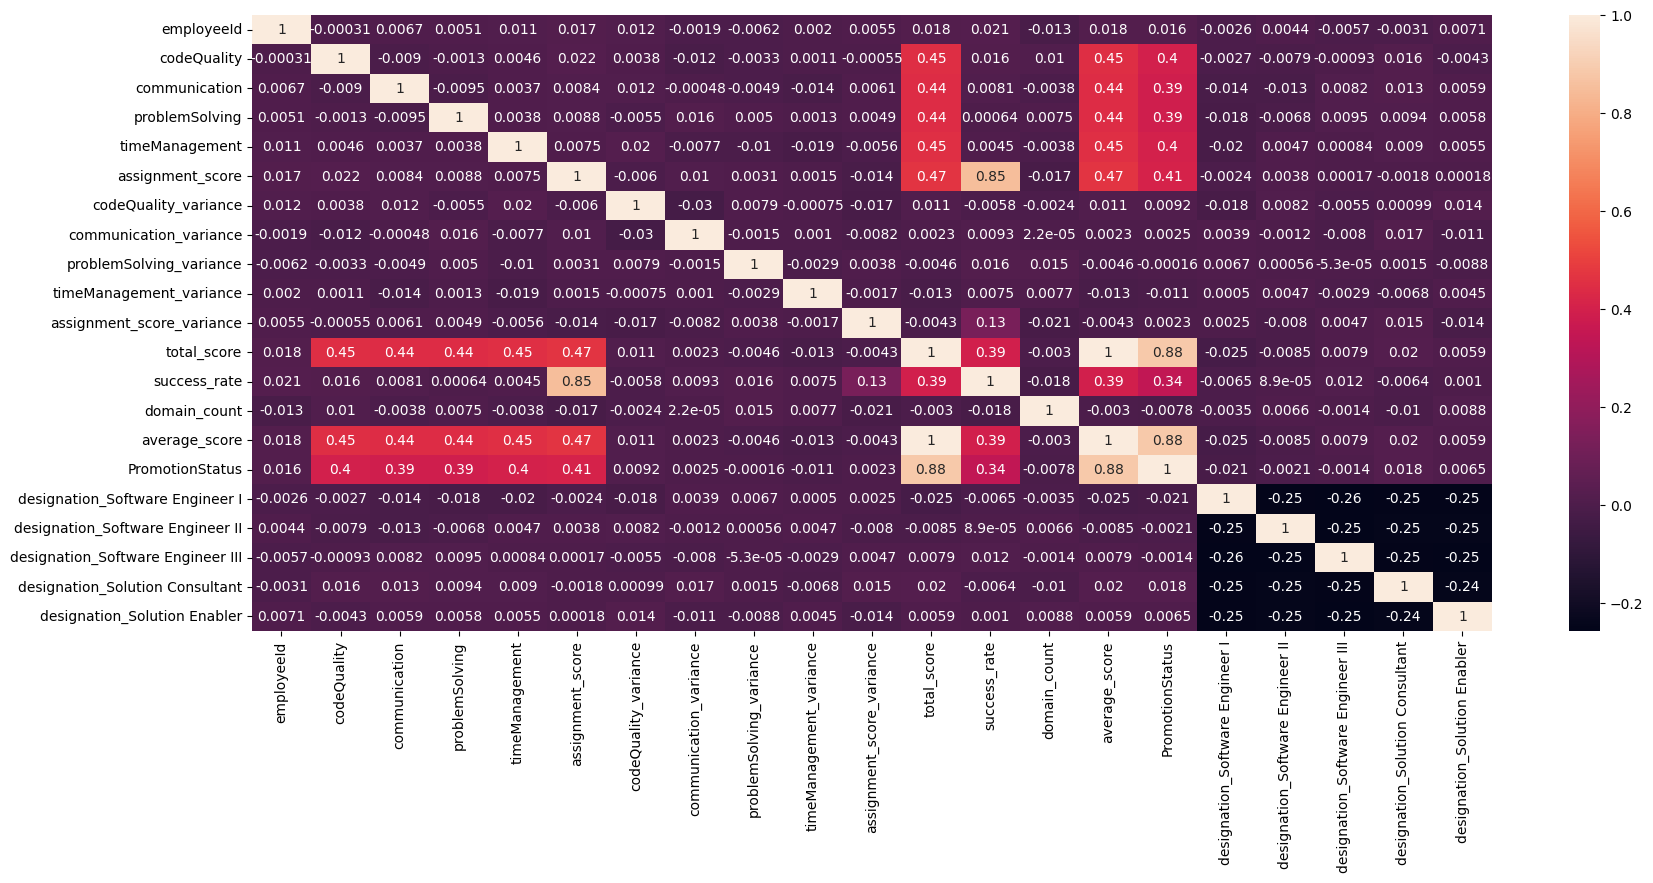

In [29]:
plt.figure(figsize=(20, 8))
sns.heatmap(training_data.corr(),annot=True)

In [57]:
training_data_01= training_data.drop(columns=['total_score', 'average_score'])
training_data_01.info()

training_data_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   employeeId                         10000 non-null  int64  
 1   codeQuality                        10000 non-null  float64
 2   communication                      10000 non-null  float64
 3   problemSolving                     10000 non-null  float64
 4   timeManagement                     10000 non-null  float64
 5   assignment_score                   10000 non-null  float64
 6   codeQuality_variance               10000 non-null  float64
 7   communication_variance             10000 non-null  float64
 8   problemSolving_variance            10000 non-null  float64
 9   timeManagement_variance            10000 non-null  float64
 10  assignment_score_variance          10000 non-null  float64
 11  success_rate                       10000 non-null  floa

In [58]:
X = training_data_01.drop('PromotionStatus', axis=1)  # Features
y = training_data_01['PromotionStatus']  # Target

In [63]:
import numpy as np
noise = np.random.normal(0, 1, X.shape)  # Add Gaussian noise
X_noisy = X + noise  

    Train Model

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [69]:
# %pip install imbalanced-learn
# 

In [70]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    RandomForest Classifier

In [71]:
model = RandomForestClassifier(random_state=42)  # Use class weight if needed
# model.fit(X_train, y_train)
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 232   57    0]
 [  41 1100   48]
 [   0   80  442]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.83       289
           1       0.89      0.93      0.91      1189
           2       0.90      0.85      0.87       522

    accuracy                           0.89      2000
   macro avg       0.88      0.86      0.87      2000
weighted avg       0.89      0.89      0.89      2000



In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)  # 5-fold cross-validation
print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())

Cross-validation scores: [0.809  0.8765 0.89   0.8865 0.9115]
Mean accuracy: 0.8747


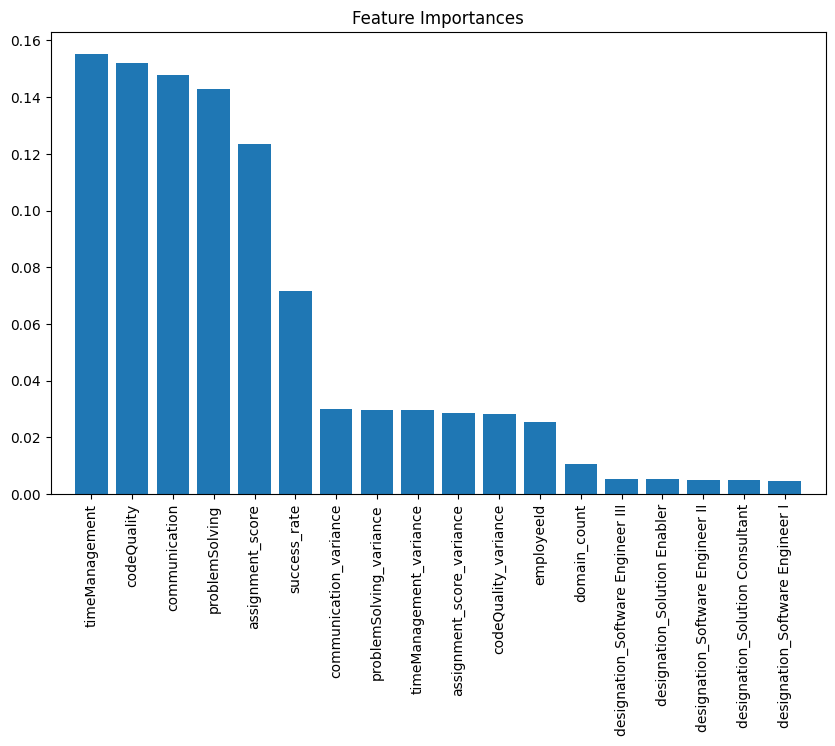

In [73]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

    Logistic Regression Model

In [74]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)  # Simple model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[  18  265    6]
 [   2 1016  171]
 [   0  238  284]]
              precision    recall  f1-score   support

           0       0.90      0.06      0.12       289
           1       0.67      0.85      0.75      1189
           2       0.62      0.54      0.58       522

    accuracy                           0.66      2000
   macro avg       0.73      0.49      0.48      2000
weighted avg       0.69      0.66      0.61      2000



c:\Users\agarw\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
